In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from re import X
from sklearn.metrics import accuracy_score

LABELS = ["regular", "spam"]

In [49]:
data = pd.read_csv("/content/drive/MyDrive/SMS SPAM/spam.csv",  encoding='latin1')
data.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [50]:
data.shape

(5572, 5)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


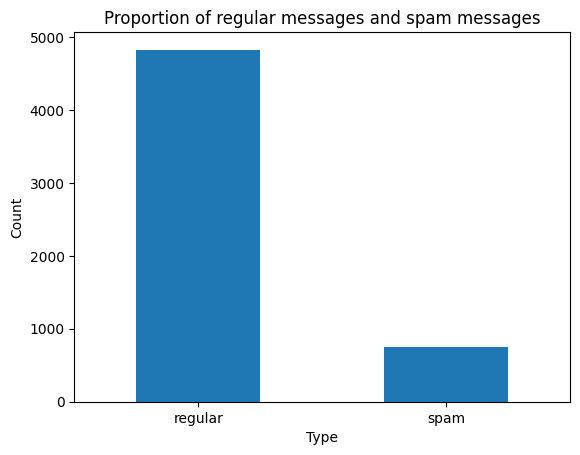

In [52]:
count_classes = pd.value_counts(data['v1'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Proportion of regular messages and spam messages")
plt.xticks(range(2), LABELS)
plt.xlabel("Type")
plt.ylabel("Count");

In [53]:
X = data.drop('v1', axis=1)
y = data['v1']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(data['v2'])
y_train = data['v1']

In [56]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [57]:
X_test = tfidf_vectorizer.transform(data['v2'])

In [58]:
predictions = clf.predict(X_test)

In [59]:
pd.DataFrame({'Message': data['v2'], 'Predicted_type': predictions})

Message Predicted_type
0     Go until jurong point, crazy.. Available only ...            ham
1                         Ok lar... Joking wif u oni...            ham
2     Free entry in 2 a wkly comp to win FA Cup fina...           spam
3     U dun say so early hor... U c already then say...            ham
4     Nah I don't think he goes to usf, he lives aro...            ham
...                                                 ...            ...
5567  This is the 2nd time we have tried 2 contact u...           spam
5568              Will Ì_ b going to esplanade fr home?            ham
5569  Pity, * was in mood for that. So...any other s...            ham
5570  The guy did some bitching but I acted like i'd...            ham
5571                         Rofl. Its true to its name            ham

[5572 rows x 2 columns]

In [60]:
accuracy = clf.score(X_train, y_train)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9773869346733668
